In [2]:
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


### import and process the data

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


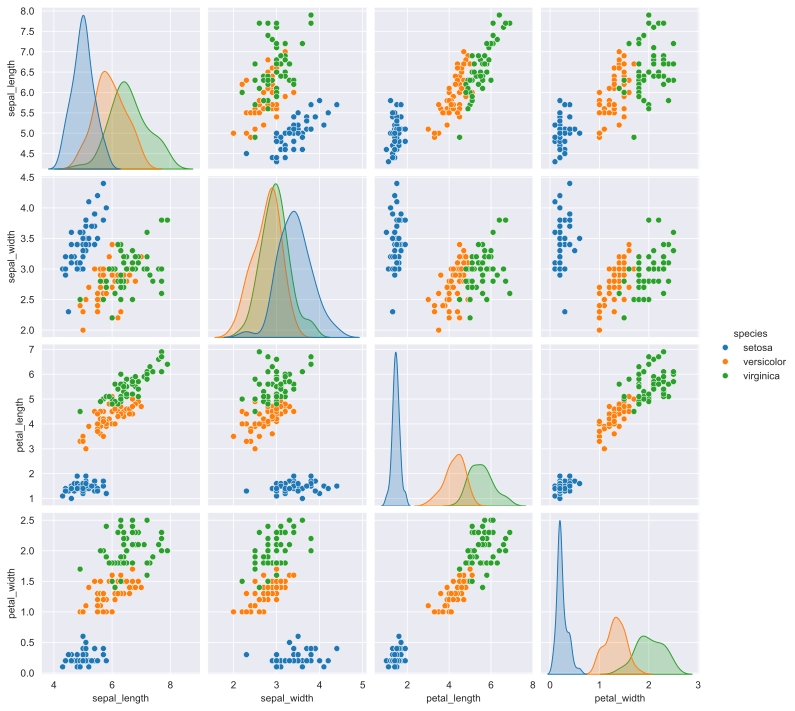

In [4]:
sns.pairplot(iris, hue='species')
plt.show()

In [7]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transfer species to number
labels = torch.zeros(len(data),dtype=torch.long)
 
# labels[iris.species == "setosa"] = 0 # don't need because of 0's
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2


print(labels.shape)

torch.Size([150])


### Create the ANN model

In [37]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
)

# loss function
lossFn = nn.CrossEntropyLoss() # automation compute log softmax

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

### Training Model

In [38]:
num_ecpochs = 1000

# init losses
losses = torch.zeros(num_ecpochs)
onGoingAcc = []

for epochI in range(num_ecpochs):
    
    # forward pass
    yHat = ANNiris(data)
    
    # compute loss
    loss = lossFn(yHat, labels)
    losses[epochI] = loss.item()
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # compute acc
    matches = torch.argmax(yHat, dim=1)==labels
    matchesNumberic = matches.float()
    accuracyPct = 100*torch.mean(matchesNumberic)
    onGoingAcc.append(accuracyPct)
    
# final forward pass
predictions = ANNiris(data)

predLabels = torch.argmax(predictions, dim=1)
totalAcc = 100*torch.mean((predLabels == labels).float())

### Visualize the results

Final ACC: 98.0%


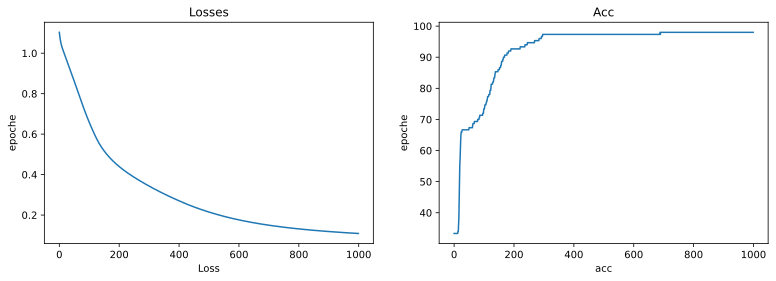

In [39]:
# report acc
print("Final ACC: {}%".format(totalAcc))

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_xlabel("Loss")
ax[0].set_ylabel("epoche")
ax[0].set_title("Losses")

ax[1].plot(onGoingAcc)
ax[1].set_xlabel("acc")
ax[1].set_ylabel("epoche")
ax[1].set_title("Acc")
plt.show()

In [40]:
# confirm that all model pred sm to one
sm = nn.Softmax(1)
torch.sum(sm(yHat), dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

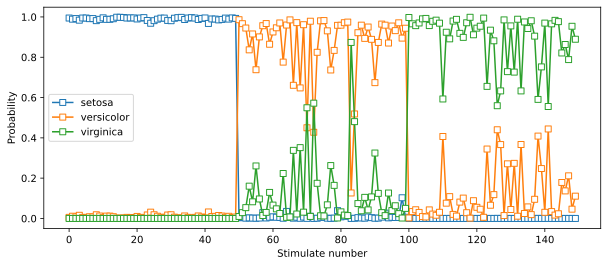

In [41]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel("Stimulate number")
plt.ylabel("Probability")
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [9]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel("Stimulate number")
plt.ylabel("Raw Output")
plt.legend(['setosa','versicolor','virginica'])
plt.show()

NameError: name 'yHat' is not defined

<Figure size 1000x400 with 0 Axes>